In [2]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import keras

In [2]:
#Carregamento da base de dados
base = pd.read_csv('idh_pontuado.csv')
base.head()

,País,PIB,ILE,IPC,IDH
0,África do Sul,0.004457,6.97,44,0.709
1,Albânia,0.000182,7.81,35,0.795
2,Alemanha,0.045774,7.91,80,0.947
3,Angola,0.001282,5.50,26,0.581
4,Arábia Saudita,0.008244,6.85,53,0.854


In [3]:
#Definindo variáveis independentes e variáveis dependentes
X = base.iloc[:,3].values
Z = base.iloc[:,2].values
y = base.iloc[:,4].values

In [4]:
#Transformando o formato de X de vetor para matriz
X = X.reshape(-1, 1)
Z = Z.reshape(-1, 1)

In [5]:
#Regressão Linear de X
modeloX = LinearRegression()
modeloX.fit(X, y)

LinearRegression()

In [6]:
#Interceptação de X
modeloX.intercept_

0.4516011270973598

In [7]:
#Inclinação de X
modeloX.coef_

array([0.00626308])

In [8]:
#Coeficiente de determinação para a variável ICP
modeloX.score(X, y)

0.5827409230476603

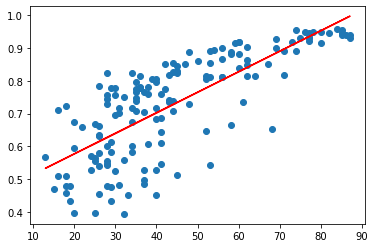

In [9]:
#Visualisando gráfico de dispersão de X
plt.scatter(X, y)
plt.plot(X, modeloX.predict(X), color = 'red')

In [10]:
#Previsão do IDH utilizando a variável ICP
modeloX.predict([[50]])

array([0.7647553])

In [11]:
#Regressão Linear de Y
modeloZ = LinearRegression()
modeloZ.fit(Z, y)

LinearRegression()

In [12]:
#Interceptação de Y
modeloZ.intercept_

-0.03410066165742354

In [13]:
#Inclinação de Y
modeloZ.coef_

array([0.10984783])

In [14]:
#Coeficiente de determinação para a variável ICP
modeloZ.score(Z, y)

0.4624237999041604

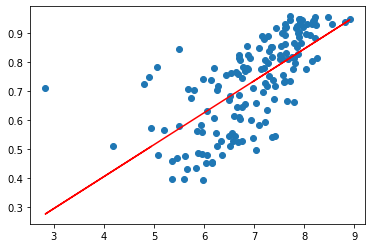

In [15]:
#Visualizando gráfico de dispersão de Z
plt.scatter(Z, y)
plt.plot(Z, modeloZ.predict(Z), color = 'red')

In [16]:
#Modelo de Regressão Linear para duas váriáveis (ILE e IPC)
X2 = base.iloc[:,2:4].values
y2 = base.iloc[:,4].values

In [17]:
#Regressão Linear
modelo2 = LinearRegression()
modelo2.fit(X2, y2)

LinearRegression()

In [18]:
#Interceptação
modelo2.intercept_

0.21858401802880767

In [19]:
#Inclinação
modelo2.coef_

array([0.04375263, 0.00466343])

In [20]:
#Coeficiente de determinação para duas variáveis (ILE e IPC)
modelo2.score(X2, y2)

0.6180871178063915

In [25]:
#Previsão do IDH utilizando as variáveis ILE e IPC
modelo2.predict([[5.50, 50]])

array([0.69239476])

In [24]:
#Previsão de novo registro utilizando variável para armazenar os dados previsores
novo = np.array([[5.50, 50]])
modelo2.predict(novo)

array([0.69239476])

In [26]:
#Modelo ajustado de Regressão Linear com duas variáveis utilizando Stats Models
modelo3_ajustado = sm.ols(formula = 'IDH ~ ILE + IPC', data = base)
modelo3_treinado = modelo3_ajustado.fit()
modelo3_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IDH   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.05e-32
Time:                        17:18:27   Log-Likelihood:                 143.73
No. Observations:                 156   AIC:                            -281.5
Df Residuals:                     153   BIC:                            -272.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2186      0.065      3.363      0.001       0.090       0.347
ILE            0.0438      0.012      3.763      0.000       0.021       0.067
IPC            0.0047      0.001      7.897      0.000       0.003       0.006
==============================================================================
Omnibus:                        1.848   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.570
Skew:                          -0.243   Prob(JB):                        0.456
Kurtosis:                       3.079   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""